In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
%matplotlib inline

In [3]:
#read file
item_df = pd.read_csv('20190928-items.csv')
review_df = pd.read_csv('20190928-reviews.csv')

In [4]:
item_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 792 entries, 0 to 791
Data columns (total 9 columns):
asin            792 non-null object
brand           792 non-null object
title           792 non-null object
url             792 non-null object
image           792 non-null object
rating          792 non-null float64
reviewUrl       792 non-null object
totalReviews    792 non-null int64
prices          577 non-null object
dtypes: float64(1), int64(1), object(7)
memory usage: 55.8+ KB


In [6]:
review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82815 entries, 0 to 82814
Data columns (total 8 columns):
asin            82815 non-null object
name            82810 non-null object
rating          82815 non-null int64
date            82815 non-null object
verified        82815 non-null bool
title           82805 non-null object
body            82795 non-null object
helpfulVotes    33134 non-null float64
dtypes: bool(1), float64(1), int64(1), object(5)
memory usage: 4.5+ MB


In [8]:
item_df.shape

(792, 9)

In [9]:
review_df.shape

(82815, 8)

In [11]:
review_df.describe()

,rating,helpfulVotes
count,82815.000000,33134.000000
mean,3.760357,7.204835
std,1.605644,28.057901
min,1.000000,1.000000
25%,2.000000,1.000000
50%,5.000000,2.000000
75%,5.000000,4.000000
max,5.000000,932.000000


In [12]:
item_df.describe()

,rating,totalReviews
count,792.000000,792.000000
mean,3.607576,104.231061
std,0.668730,166.242503
min,1.000000,1.000000
25%,3.200000,7.000000
50%,3.700000,31.500000
75%,4.000000,122.250000
max,5.000000,984.000000


In [16]:
item_df.head()

,asin,brand,title,url,image,rating,reviewUrl,totalReviews,prices
0,B0000SX2UC,Nokia,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,NaN
1,B0009N5L7K,Motorola,Motorola I265 phone,https://www.amazon.com/Motorola-i265-I265-phon...,https://m.media-amazon.com/images/I/419WBAVDAR...,2.9,https://www.amazon.com/product-reviews/B0009N5L7K,7,$49.95
2,B000SKTZ0S,Motorola,MOTOROLA C168i AT&T CINGULAR PREPAID GOPHONE C...,https://www.amazon.com/MOTOROLA-C168i-CINGULAR...,https://m.media-amazon.com/images/I/71b+q3ydkI...,2.6,https://www.amazon.com/product-reviews/B000SKTZ0S,22,NaN
3,B00198M12M,Nokia,Nokia 6500 Slide Black/silver Unlocked Cell Phone,https://www.amazon.com/Nokia-6500-Slide-silver...,https://m.media-amazon.com/images/I/41ss4HpLkL...,2.4,https://www.amazon.com/product-reviews/B00198M12M,5,NaN
4,B001AO4OUC,Motorola,Motorola i335 Cell Phone Boost Mobile,https://www.amazon.com/Motorola-i335-Phone-Boo...,https://m.media-amazon.com/images/I/710UO8gdT+...,3.3,https://www.amazon.com/product-reviews/B001AO4OUC,21,NaN


In [17]:
review_df.head()

,asin,name,rating,date,verified,title,body,helpfulVotes
0,B0000SX2UC,Janet,3,"October 11, 2005",False,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...,1.0
1,B0000SX2UC,Luke Wyatt,1,"January 7, 2004",False,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...,17.0
2,B0000SX2UC,Brooke,5,"December 30, 2003",False,Love This Phone,"This is a great, reliable phone. I also purcha...",5.0
3,B0000SX2UC,amy m. teague,3,"March 18, 2004",False,"Love the Phone, BUT...!","I love the phone and all, because I really did...",1.0
4,B0000SX2UC,tristazbimmer,4,"August 28, 2005",False,"Great phone service and options, lousy case!",The phone has been great for every purpose it ...,1.0


In [13]:
#Check correlation in Review dataset
corr = review_df.corr()
print(corr)

                rating  verified  helpfulVotes
rating        1.000000  0.098495     -0.039845
verified      0.098495  1.000000     -0.029308
helpfulVotes -0.039845 -0.029308      1.000000


In [18]:
review_df['body_length']=review_df['body'].str.len()
review_df.head()

,asin,name,rating,date,verified,title,body,helpfulVotes,body_length
0,B0000SX2UC,Janet,3,"October 11, 2005",False,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...,1.0,1688.0
1,B0000SX2UC,Luke Wyatt,1,"January 7, 2004",False,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...,17.0,748.0
2,B0000SX2UC,Brooke,5,"December 30, 2003",False,Love This Phone,"This is a great, reliable phone. I also purcha...",5.0,768.0
3,B0000SX2UC,amy m. teague,3,"March 18, 2004",False,"Love the Phone, BUT...!","I love the phone and all, because I really did...",1.0,524.0
4,B0000SX2UC,tristazbimmer,4,"August 28, 2005",False,"Great phone service and options, lousy case!",The phone has been great for every purpose it ...,1.0,606.0


In [19]:
review_df['title_length']=review_df['title'].str.len()
review_df.head()

,asin,name,rating,date,verified,title,body,helpfulVotes,body_length,title_length
0,B0000SX2UC,Janet,3,"October 11, 2005",False,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...,1.0,1688.0,27.0
1,B0000SX2UC,Luke Wyatt,1,"January 7, 2004",False,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...,17.0,748.0,27.0
2,B0000SX2UC,Brooke,5,"December 30, 2003",False,Love This Phone,"This is a great, reliable phone. I also purcha...",5.0,768.0,15.0
3,B0000SX2UC,amy m. teague,3,"March 18, 2004",False,"Love the Phone, BUT...!","I love the phone and all, because I really did...",1.0,524.0,23.0
4,B0000SX2UC,tristazbimmer,4,"August 28, 2005",False,"Great phone service and options, lousy case!",The phone has been great for every purpose it ...,1.0,606.0,44.0


In [25]:
review_df.describe()

,rating,helpfulVotes,body_length,title_length
count,82815.000000,33134.000000,82795.000000,82805.000000
mean,3.760357,7.204835,273.044290,24.533144
std,1.605644,28.057901,577.180485,19.494290
min,1.000000,1.000000,1.000000,1.000000
25%,2.000000,1.000000,43.000000,10.000000
50%,5.000000,2.000000,117.000000,18.000000
75%,5.000000,4.000000,279.000000,33.000000
max,5.000000,932.000000,27661.000000,361.000000


In [20]:
#Check correlation in Review dataset
corr = review_df.corr()
print(corr)

                rating  verified  helpfulVotes  body_length  title_length
rating        1.000000  0.098495     -0.039845    -0.058354     -0.164703
verified      0.098495  1.000000     -0.029308    -0.273501     -0.113344
helpfulVotes -0.039845 -0.029308      1.000000     0.201983      0.055494
body_length  -0.058354 -0.273501      0.201983     1.000000      0.271709
title_length -0.164703 -0.113344      0.055494     0.271709      1.000000


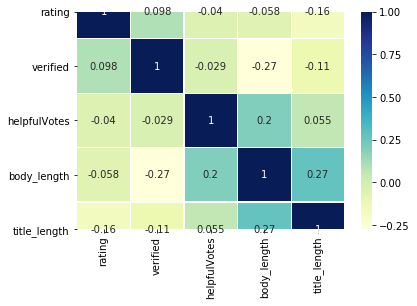

In [23]:
sns.heatmap(corr,
            annot=True,
            cmap="YlGnBu", 
            linewidths=0.1,
            annot_kws={"size": 10})
# Plot aesthetics
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.gca().xaxis.tick_bottom()
plt.show()

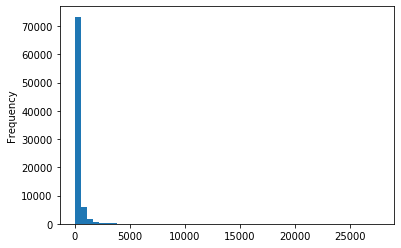

In [33]:
review_df['body_length'].plot(bins=50,kind='hist');

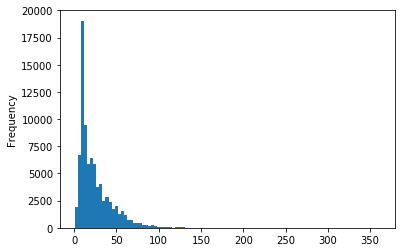

In [34]:
review_df['title_length'].plot(bins=100,kind='hist');

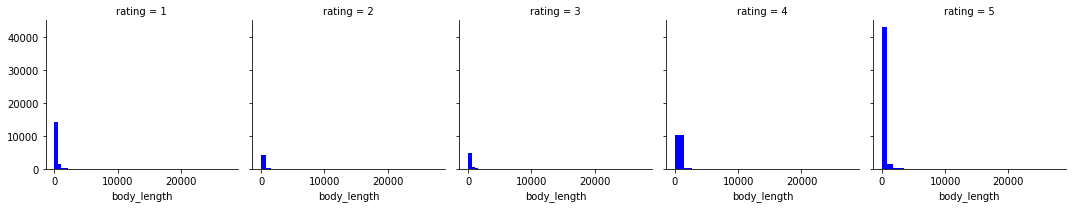

In [37]:
g=sns.FacetGrid(data=review_df,col='rating',col_wrap=5)
g.map(plt.hist,'body_length',bins=20,color='b');

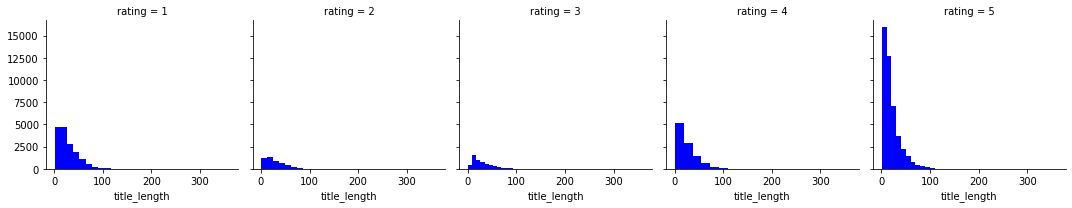

In [38]:
g=sns.FacetGrid(data=review_df,col='rating',col_wrap=5)
g.map(plt.hist,'title_length',bins=20,color='b');

In [39]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [40]:
import gc # garbage collector

from collections import Counter # for counting commong words
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import re # regular expression
import string # for finding punctuation in text
import nltk # preprocessing text
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PhuongAnh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [41]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [45]:
from textblob import TextBlob

In [50]:
review_df.body=review_df.body.astype(str)

In [52]:
def preprocess(x):
    x = re.sub('[^a-z\s]', '', x.lower())                  # get rid of noise
    x = [w for w in x.split() if w not in set(stopwords)]  # remove stopwords
    return ' '.join(x) # then join the text again
# let's find out which stopwords need to remove. We'll use english stopwords.
i = nltk.corpus.stopwords.words('english')
# punctuations to remove
j = list(string.punctuation)
# finally let's combine all of these
stopwords = set(i).union(j)
review_df['text_clear'] = review_df['body'].apply(preprocess)

def sentiment(x):
    sentiment = TextBlob(x)
    return sentiment.sentiment.polarity

review_df['senti_polarity'] = review_df['text_clear'].apply(sentiment)

In [53]:
Samsung_df = item_df[item_df['brand'].str.contains('Samsung') == True]

In [54]:
Samsung_review = review_df.loc[review_df['asin'].isin(Samsung_df.asin)]

In [55]:
def preprocess(x):
    x = re.sub('[^a-z\s]', '', x.lower())                  # get rid of noise
    x = [w for w in x.split() if w not in set(stopwords)]  # remove stopwords
    return ' '.join(x) # then join the text again
# let's find out which stopwords need to remove. We'll use english stopwords.
i = nltk.corpus.stopwords.words('english')
# punctuations to remove
j = list(string.punctuation)
# finally let's combine all of these
stopwords = set(i).union(j)
Samsung_review['text_clear'] = Samsung_review['body'].apply(preprocess)

def sentiment(x):
    sentiment = TextBlob(x)
    return sentiment.sentiment.polarity

Samsung_review['senti_polarity'] = Samsung_review['text_clear'].apply(sentiment)

C:\Users\PhuongAnh\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\PhuongAnh\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


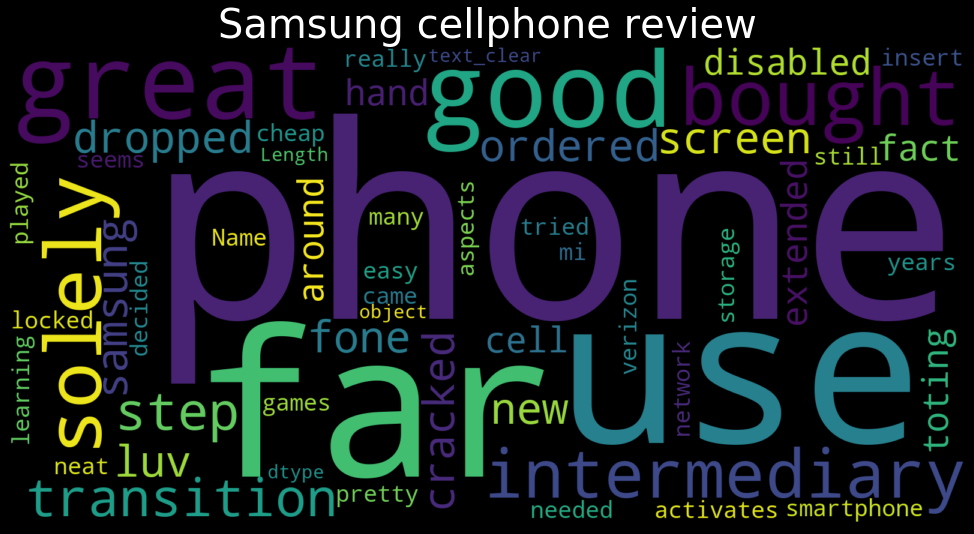

In [56]:
# difine wordcloud function from wordcloud library. set some parameteres for beatuful plotting
wc = WordCloud(width=1600, height=800, random_state=1, max_words=200000000)
# generate word cloud
wc.generate(str(Samsung_review['text_clear']))
# figure of graph
plt.figure(figsize=(20,10), facecolor='k')
# add the title to the graph
plt.title("Samsung cellphone review", fontsize=40,color='white')
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=10)
# finally show the plot
plt.show()

In [57]:
Apple_df = item_df[item_df['brand'].str.contains('Apple') == True]

In [58]:
Apple_review = review_df.loc[review_df['asin'].isin(Apple_df.asin)]

In [59]:
def preprocess(x):
    x = re.sub('[^a-z\s]', '', x.lower())                  # get rid of noise
    x = [w for w in x.split() if w not in set(stopwords)]  # remove stopwords
    return ' '.join(x) # then join the text again
# let's find out which stopwords need to remove. We'll use english stopwords.
i = nltk.corpus.stopwords.words('english')
# punctuations to remove
j = list(string.punctuation)
# finally let's combine all of these
stopwords = set(i).union(j)
Apple_review['text_clear'] = Apple_review['body'].apply(preprocess)

def sentiment(x):
    sentiment = TextBlob(x)
    return sentiment.sentiment.polarity

Apple_review['senti_polarity'] = Apple_review['text_clear'].apply(sentiment)

C:\Users\PhuongAnh\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\PhuongAnh\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


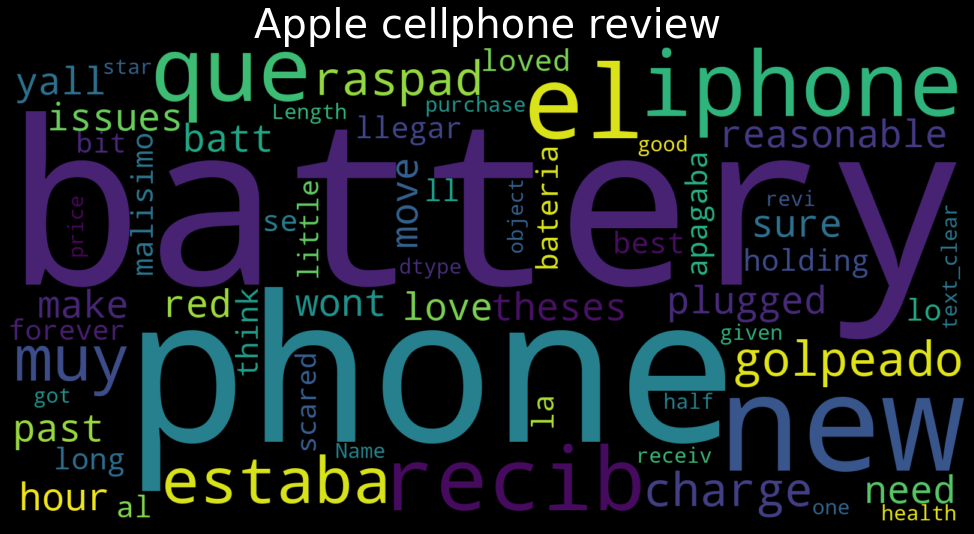

In [60]:
# difine wordcloud function from wordcloud library. set some parameteres for beatuful plotting
wc = WordCloud(width=1600, height=800, random_state=1, max_words=200000000)
# generate word cloud
wc.generate(str(Apple_review['text_clear']))
# figure of graph
plt.figure(figsize=(20,10), facecolor='k')
# add the title to the graph
plt.title("Apple cellphone review", fontsize=40,color='white')
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=10)
# finally show the plot
plt.show()

In [62]:
#drop null
review_df.dropna(subset=['body'], inplace=True)

In [63]:
def preprocess(x):
    x = re.sub('[^a-z\s]', '', x.lower())                  # get rid of noise
    x = [w for w in x.split() if w not in set(stopwords)]  # remove stopwords
    return ' '.join(x) # then join the text again
# let's find out which stopwords need to remove. We'll use english stopwords.
i = nltk.corpus.stopwords.words('english')
# punctuations to remove
j = list(string.punctuation)
# finally let's combine all of these
stopwords = set(i).union(j)
review_df['text_clear'] = review_df['body'].apply(preprocess)

def sentiment(x):
    sentiment = TextBlob(x)
    return sentiment.sentiment.polarity

review_df['senti_polarity'] = review_df['text_clear'].apply(sentiment)

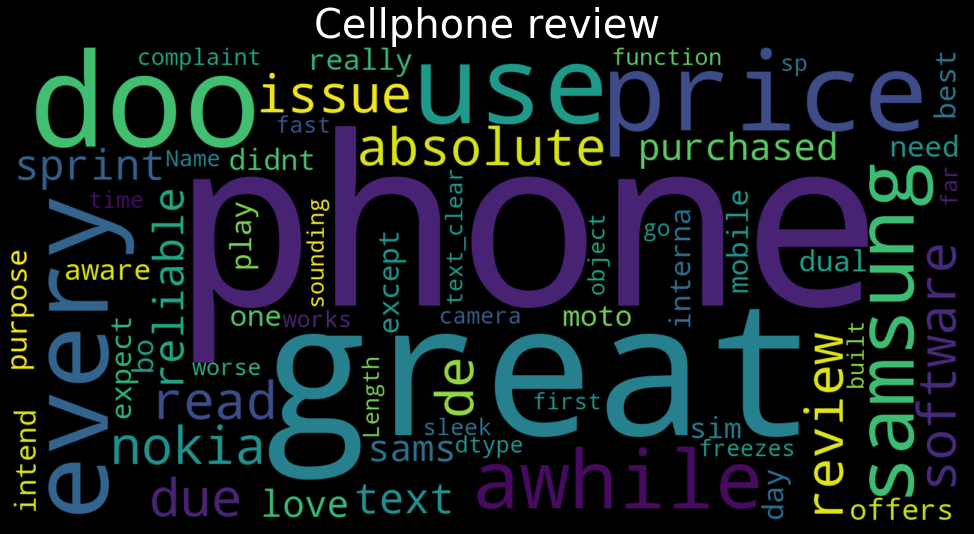

In [64]:
# difine wordcloud function from wordcloud library. set some parameteres for beatuful plotting
wc = WordCloud(width=1600, height=800, random_state=1, max_words=200000000)
# generate word cloud
wc.generate(str(review_df['text_clear']))
# figure of graph
plt.figure(figsize=(20,10), facecolor='k')
# add the title to the graph
plt.title("Cellphone review", fontsize=40,color='white')
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=10)
# finally show the plot
plt.show()